### 数据清洗

In [3]:
#读取数据库数据
import pandas as pd
from pandas import DataFrame as df
Comment_data = pd.read_csv('data/JDComment_data.csv')  # 读取训练数据

In [4]:
Comment_data[Comment_data['评论内容'] == '此用户未填写评价内容' ]#查看评论前几行数据

,用户ID,评论内容,会员级别,点赞数,回复数,得分,购买时间,手机型号
3985,12512647810,此用户未填写评价内容,铜牌会员,0,0,5,2019-03-05 15:44:19,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4002,12511539300,此用户未填写评价内容,金牌会员,0,0,5,2019-03-05 10:29:41,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4016,12510642159,此用户未填写评价内容,注册会员,0,0,5,2019-03-04 22:32:15,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4019,12510365973,此用户未填写评价内容,金牌会员,0,0,5,2019-03-04 21:05:51,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4059,12507908284,此用户未填写评价内容,银牌会员,0,0,5,2019-03-04 09:28:01,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4079,12506443899,此用户未填写评价内容,PLUS会员,0,0,5,2019-03-03 18:22:05,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4085,12505863015,此用户未填写评价内容,注册会员,0,0,5,2019-03-03 15:28:28,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4138,12503963100,此用户未填写评价内容,PLUS会员,0,0,3,2019-03-02 22:14:36,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4150,12503323293,此用户未填写评价内容,银牌会员,0,0,5,2019-03-02 18:49:40,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机
4193,12501730345,此用户未填写评价内容,银牌会员,0,0,5,2019-03-02 10:51:11,Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机


填充缺省值以及删除第一行

In [5]:
Comment_data.drop(index=0,axis=0) #删除第一行
Comment_data.isnull().any()#查看哪些列存在空值

用户ID    False
评论内容    False
会员级别    False
点赞数     False
回复数     False
得分      False
购买时间    False
手机型号    False
dtype: bool

In [6]:
#Comment_data[Comment_data.isnull().values==True]
for col in Comment_data:
    if col == "会员级别" or col == "评论内容":
        Comment_data[col].fillna('', inplace=True)
    elif col == "用户ID":
        Comment_data[col].fillna('00000000000', inplace=True)
    else:
        Comment_data[col].fillna(0, inplace=True)
Comment_data.isnull().any()#查看是否进行了填充

用户ID    False
评论内容    False
会员级别    False
点赞数     False
回复数     False
得分      False
购买时间    False
手机型号    False
dtype: bool

(DataFrame筛选数据与loc用法)[https://blog.csdn.net/junbujianwpl/article/details/70473659]

In [7]:
#Comment_data[Comment_data.评论内容.duplicated()].count()
#print(Comment_data[Comment_data.评论内容.duplicated()].count())	# 最后两项重复
#print(len(Comment_data[Comment_data.评论内容 == '此用户未填写评价内容']))
Comment_data[Comment_data['评论内容']=="此用户未填写评价内容"] = ""#清空未评价信息
print(len(Comment_data[Comment_data['评论内容']!=""])) #统计有效评论数

21091


## 数据可视化及分析
### 会员等级编码

In [8]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# 会员等级分类
data = Comment_data[Comment_data['会员级别']!='']
value1 = array(data['会员级别'])
phone_type = Comment_data[Comment_data['手机型号']!='']
value2 = array(data['手机型号'])
#print(values)
# 手机型号分类
#整数编码
level_encoder = LabelEncoder()
phone_type_encode = LabelEncoder()
integer_level_encoded = level_encoder.fit_transform(value1)
integer_type_encoded = phone_type_encode.fit_transform(value2)
#print(label_encoder.get_params(False))
print(integer_level_encoded)
userLevel = level_encoder.classes_
print(level_encoder.classes_)
print(integer_type_encoded)
phone_type = phone_type_encode.classes_
print(phone_type_encode.classes_)

[6 0 0 ... 5 7 0]
['PLUS会员' 'PLUS会员[试用]' '企业会员' '注册会员' '金牌会员' '钻石会员' '铜牌会员' '银牌会员']
[0 0 0 ... 3 3 3]
['Apple iPhone 8 Plus (A1864) 256GB 金色 移动联通电信4G手机'
 'Apple iPhone 8 Plus (A1864) 256GB 银色 移动联通电信4G手机'
 'Apple iPhone 8 Plus (A1864) 64GB 深空灰色 移动联通电信4G手机'
 'Apple iPhone 8 Plus 256GB 红色特别版 移动联通电信4G手机']


### 购买时间处理

In [9]:
hourList = []
month = []
year = []
useLessData = 0
for i in Comment_data['购买时间']:
    try:
        #print(str(i))
        hourList.append(str(i).split(' ')[1].split(':')[0])
        month.append(str(i).split(' ')[0].split('-')[1])
        year.append(str(i).split(' ')[0].split('-')[0])
    except:
        useLessData += 1
print('无效数据有%s条'%useLessData)
phone_year_encode = LabelEncoder()
year_encoded = phone_year_encode.fit_transform(year)
print(phone_year_encode.classes_)
print(year_encoded)

无效数据有625条
['2017' '2018' '2019']
[2 1 2 ... 2 2 2]


In [10]:
import random
from pyecharts import Bar
attr = ["{}时".format(i) for i in range(24)]
v1 = [hourList.count(str(_).rjust(2,'0')) for _ in range(24)]
bar = Bar("手机购买时段",title_color='#FF0000',background_color='#7EC0EE')
bar.add("", attr, v1, is_label_show=True, is_datazoom_show=True)
bar

分析一天中不同时段消费者的手机购买情况，可以分析得出，大部分消费者在午时（10-12时）和晚上（20-22时）出现了消费高峰期，在此时段顾客购买商品的概率更大，他们浏览商品的机会更多

In [11]:
import numpy as np

v = [[]]
for level in level_encoder.classes_:
    print(level)
    df = Comment_data[Comment_data['会员级别'] == level]
    hourList = []
    month = []
    for i in df['购买时间']:
        try:
            #print(str(i).split(' ')[0].split('-')[1])
            month.append(str(i).split(' ')[0].split('-')[1])
        except:
            useLessData += 1
    print(useLessData)
    data = []
    for _ in range(1, 13):
        if(_ < 10):
            data.append(month.count('0'+str(_)))
        else:
            data.append(month.count(str(_)))
    #print(data)
    v.append(data)
print(v)

PLUS会员
625
PLUS会员[试用]
625
企业会员
625
注册会员
625
金牌会员
625
钻石会员
625
铜牌会员
625
银牌会员
625
[[], [747, 995, 981, 256, 292, 396, 252, 304, 232, 372, 1404, 404], [12, 151, 83, 4, 4, 0, 4, 4, 8, 4, 24, 0], [76, 28, 4, 0, 4, 0, 4, 0, 0, 8, 4, 24], [360, 502, 236, 0, 0, 0, 0, 0, 0, 0, 0, 20], [572, 616, 651, 224, 228, 352, 208, 196, 204, 228, 912, 276], [372, 426, 354, 136, 156, 272, 140, 116, 104, 268, 784, 220], [285, 496, 228, 0, 0, 0, 0, 0, 0, 0, 0, 8], [653, 782, 553, 176, 136, 300, 224, 212, 156, 124, 384, 156]]


In [12]:
from pyecharts import Line
import numpy as np

attr = ["一月", "二月", "三月", "四月", "五月", "六月",'七月','八月','九月','十月','十一月','十二月']
#plus = Comment_data[Comment_data['会员级别']=='PLUS会员']
#v1 = [month.count(str(_)) for _ in range(0, 12)]
#v2 = [55, 60, 16, 20, 15, 80]
line = Line("月消费与会员等级分析",title_color='#20B2AA',background_color='#F0F8FF')
count = 1
saleSum = 0.0
for level in level_encoder.classes_:
    line.add(level, attr, v[count], mark_point=["average"], legend_pos ='right',legend_top ='7%')
    saleSum += np.mean(v[count])
    count += 1
count = 1
for level in level_encoder.classes_:
    print("%s所占比例%.2lf%%"%(level, np.mean(v[count])*100 / saleSum))
    count += 1
    
#line.add("PLUS会员", attr, v1, mark_point=["average"])

#line.add("商家B", attr, v2, is_smooth=True, mark_line=["max", "average"])
line

PLUS会员所占比例31.46%
PLUS会员[试用]所占比例1.41%
企业会员所占比例0.72%
注册会员所占比例5.30%
金牌会员所占比例22.13%
钻石会员所占比例15.87%
铜牌会员所占比例4.82%
银牌会员所占比例18.28%


通过分析上图可知，不论是哪种会员，他们在三月份前后以及十二月份前后购买手机的可能性最大，这可能大家新的一年想换一个新手机的想法有关，在这些月份进行手机推荐可能会有不错的收获。并且分析不同会员的购买情况可知，他们购买的频次降序排列为PLUS会员》金牌会员》银牌会员=钻石会员》PLUS会员（试用）》企业会员。
分析原因，大致是因为PLUS会员大部分都属于高消费群体，他们购买这些价值昂贵的手机概率更大。因此，大致可以推断，这款手机的主要消费对象是京东商城的PLUS会员（31.00%）、金牌会员（21.87%）、银牌会员（18.52%）。

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
 
data = Comment_data['评论内容'].tolist()
dataStr = ','.join(data)
#print(','.join(data))

注:此处可能因评论数据量太大，出现数据溢出问题，解决方案参照[处理Jupyter Notebook报错：IOPub data rate exceeded](https://blog.csdn.net/LaoChengZier/article/details/80705298)

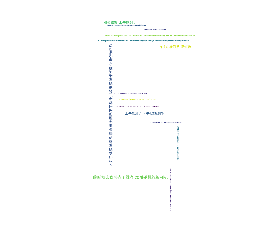

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
 
backgroup_Image = plt.imread('picture/phone.jpg') #笼罩图
 
#f = open('人工智能.txt','r').read()  #生成词云的文档
wordcloud = WordCloud(
        background_color = 'white', #背景颜色，根据图片背景设置，默认为黑色
        mask = backgroup_Image, #笼罩图
        font_path = 'C:\Windows\Fonts\STZHONGS.TTF',#若有中文需要设置才会显示中文
        width = 1000,
        height = 1200,
        margin = 2).generate(dataStr) # generate 可以对全部文本进行自动分词
#参数 width，height，margin分别对应宽度像素，长度像素，边缘空白处
 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
 
#保存图片：默认为此代码保存的路径
wordcloud.to_file('picture/phoneComment.jpg')

从图中可以看出，存在一些无效数据，没有处理，比如hellip就是无效数据。并且标点符号的影响使得一些评论次数比较多的句子
显示了出来，这显然不太符合预期的词图效果。
下面去在去除一些冗余的数据之后，重新进行分词并生存词云

In [18]:
dataStr = dataStr.replace('hellip','')
dataStr = dataStr.replace('。','')
dataStr = dataStr.replace('，','').replace('！','').replace(',','').replace('&','').replace('...','')

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
DEBUG:jieba:Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.362 seconds.
DEBUG:jieba:Loading model cost 1.362 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


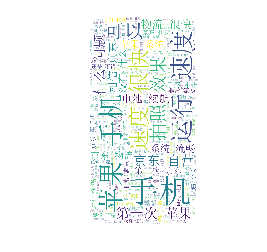

In [19]:
# -*- coding: utf-8 -*-
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import os
backgroup_Image = plt.imread('picture/phone.jpg') #笼罩图
wordlist = jieba.cut(dataStr, cut_all=False)
word_string = " ".join(wordlist)
wordcloud = WordCloud(font_path='front/simsun.ttc', background_color="white",mask = backgroup_Image, width=1000, height=860, margin=2).generate(word_string)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('picture/phoneComment.jpg')

通过上面此图基本可以看出消费者对该款手机的整体评价，但其中可能还有一些刷单的情况，这些量无法控制，没法排除，因此还是要理性的看待一款手机综合性能。

In [20]:
from pyecharts import Pie
from pyecharts import Timeline
#attr = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
attr = phone_type
year1 = []
year2 = []
year3 = []
Comment_data['购买时间'] = Comment_data['购买时间'].map(lambda x:x.split(' ')[0].split('-')[0])
#print(Comment_data)
#year1 = Comment_data[Comment_data['手机型号']==typ
data1 = Comment_data[Comment_data['购买时间'] == '2017']
data2 = Comment_data[Comment_data['购买时间'] == '2018']
data3 = Comment_data[Comment_data['购买时间'] == '2019']
#res = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
#data = Comment_data[Comment_data['手机型号']=='Apple iPhone 8 Plus 256GB 红色特别版 移动联通电信4G手机']
v1 = [len(data1[data1['手机型号']==typ]) for typ in phone_type]
v2 = [len(data2[data2['手机型号']==typ]) for typ in phone_type]
v3 = [len(data3[data3['手机型号']==typ]) for typ in phone_type]
#print(v1)
#v2 = [len(Comment_data[Comment_data['手机型号']==typ]& Comment_data['购买时间'] == '2018') for typ in phone_type]
#v3 = [len(Comment_data[Comment_data['手机型号']==typ]& Comment_data['购买时间'] == '2019') for typ in phone_type]
#print(v1)
pie_1 = Pie("2017 年手机售出情况", title_pos='center',background_color='#F0F8FF')
pie_1.add("",attr,v1,radius=[40, 75],label_text_color=None,is_label_show=True,legend_orient="vertical",legend_pos="left",is_legend_show=False)
pie_2 = Pie("2018 年手机售出情况", title_pos='center',background_color='#F0F8FF')
pie_2.add("",attr,v2,radius=[40, 75],label_text_color=None,is_label_show=True,legend_orient="vertical",legend_pos="left",is_legend_show=False)
pie_3 = Pie("2019 年手机售出情况", title_pos='center',background_color='#F0F8FF')
pie_3.add("",attr,v3,radius=[40, 75],label_text_color=None,is_label_show=True,legend_orient="vertical",legend_pos="left",is_legend_show=False)
timeline = Timeline(is_auto_play=True, timeline_bottom=0)
timeline.add(pie_1, '2017 年')
timeline.add(pie_2, '2018 年')
timeline.add(pie_3, '2019 年')
timeline
#

## Referer反爬虫测试

In [ ]:
import requests

url = "https://sclub.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98vv16247&productId=100000177760&score=0&sortType=5&page=6&pageSize=10&isShadowSku=0&rid=0&fold=1"
headers = {
    'Accept': '*/*',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
    'Referer':"https://item.jd.com/100000177760.html#comment"}
r = requests.get(url,headers=headers)
print(r.text)

In [ ]:
name = "\xca\xd6\xbb\xfa\xba\xdc\xba\xc3\xa3\xac\xd0\xc2\xca"
print(name.encode().decode('unicode_escape'))